### Trabajo Final Master Ciencia de Datos y Business Analytics
## Reporte Laboratorio Seco - Creación Data Set Sportline Colombia POS (Weekly)

Actualización Septiembre 30, 2023

### Introducción
El siguiente análisis de laboratorio seco compone el archivo maestro de POS de los años 2018 al 2023 de Sportline Colombia, eliminando todos los demás clientes y preparando el archivo final para entrenamiento. La cuenta de Sportline Colombia es la cuenta número 10-2672 en los registros de la empresa. Como primer paso se lee el archivo POS Maestro para poder filtrar los diferentes datos. 

El archivo __alterno__ sin embargo tiene una diferencia vital: esta compuesto por valores semanales de ventas para disminuir un poco la variación intrinseca de los valores diarios. 

In [1]:
# Importar y leer archivo como DF Pandas
# Los archivos se leen de los formatos por año ya limpios

import pandas as pd
csv_file_path = '/Users/ameilij/Documents/Master Data Science/MDS/tfm/data_clean/master_POS_clean.csv'
encoding = 'latin1'
dfPOS = pd.read_csv(csv_file_path, encoding=encoding)
dfPOS.info()

/var/folders/9c/f5lf7vz91zs8mwbnjbtxzjgw0000gn/T/ipykernel_17957/2346163983.py:7: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  dfPOS = pd.read_csv(csv_file_path, encoding=encoding)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20650730 entries, 0 to 20650729
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   NO_CLIENTE     object 
 1   FECHA          object 
 2   CODIGO_MARCA   float64
 3   NOMBRE_MODELO  object 
 4   CANTIDAD       int64  
 5   CODIGO_TEMP    object 
 6   WEEK_OF_YEAR   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ GB


Procedemos a crear el archivo solamente con filas pertenecientes a resultados POS del a cuenta 10-2672, Sportline América Colombia, la unidad más grande de la franquicia. 

In [2]:
# Filtrar el DataFrame para que solo queden filas donde NO_CLIENTE = "10-2672"
SLA_df = dfPOS.loc[dfPOS['NO_CLIENTE'] == '10-2672'].copy()
SLA_df.reset_index(drop=True, inplace=True)
del dfPOS

SLA_df.head()

,NO_CLIENTE,FECHA,CODIGO_MARCA,NOMBRE_MODELO,CANTIDAD,CODIGO_TEMP,WEEK_OF_YEAR
0,10-2672,2018-01-02,789.0,703104-687,-1,FA17,2018-00
1,10-2672,2018-01-02,789.0,832969-457,1,FA17,2018-00
2,10-2672,2018-01-02,789.0,856875-429,1,HO17,2018-00
3,10-2672,2018-01-02,456.0,749912-108,1,SU16,2018-00
4,10-2672,2018-01-02,456.0,908995-001,1,HO17,2018-00


In [3]:
SLA_df.tail()

,NO_CLIENTE,FECHA,CODIGO_MARCA,NOMBRE_MODELO,CANTIDAD,CODIGO_TEMP,WEEK_OF_YEAR
4821541,10-2672,2023-07-02,NaN,N0002650-082,1,HO19,2023-27
4821542,10-2672,2023-07-02,NaN,NLGC6-010,1,HO19,2023-27
4821543,10-2672,2023-07-02,NaN,BJ0555-001,1,HO19,2023-27
4821544,10-2672,2023-07-02,NaN,95B701-023,2,HO19,2023-27
4821545,10-2672,2023-07-02,NaN,95B701-023,1,HO19,2023-27


Vamos a modificar la columna FECHA al tipo `timestamp` para poder extraer _features_ interesantes a la hora del análisis EDA.

In [4]:
# Convert the "FECHA" column to datetime data type
SLA_df['FECHA'] = pd.to_datetime(SLA_df['FECHA'], format= '%Y-%m-%d')
first_row_vertically = SLA_df.head(1).transpose()
print(first_row_vertically)

                                 0
NO_CLIENTE                 10-2672
FECHA          2018-01-02 00:00:00
CODIGO_MARCA                 789.0
NOMBRE_MODELO           703104-687
CANTIDAD                        -1
CODIGO_TEMP                   FA17
WEEK_OF_YEAR               2018-00


El próximo paso es agrupar las ventas por semana, lo que nos facilita reduciendo la cantidad de datos sin perder nada de información. Esto también facilitará el análisis EDA en el próximo ciclo de laboratorio seco.  

In [6]:
SLA_df['FECHA'] = pd.to_datetime(SLA_df['FECHA'])
weekly_sales = SLA_df.groupby(['CODIGO_MARCA', 'WEEK_OF_YEAR'])['CANTIDAD'].sum().reset_index()

In [8]:
weekly_sales.head()

,CODIGO_MARCA,WEEK_OF_YEAR,CANTIDAD
0,456.0,2018-00,7008
1,456.0,2018-01,10634
2,456.0,2018-02,7706
3,456.0,2018-03,5586
4,456.0,2018-04,4387


Revisamos la topología del juego de datos para asegurarnos que la serie de tiempos representa la data reducida a ventas semanales. 

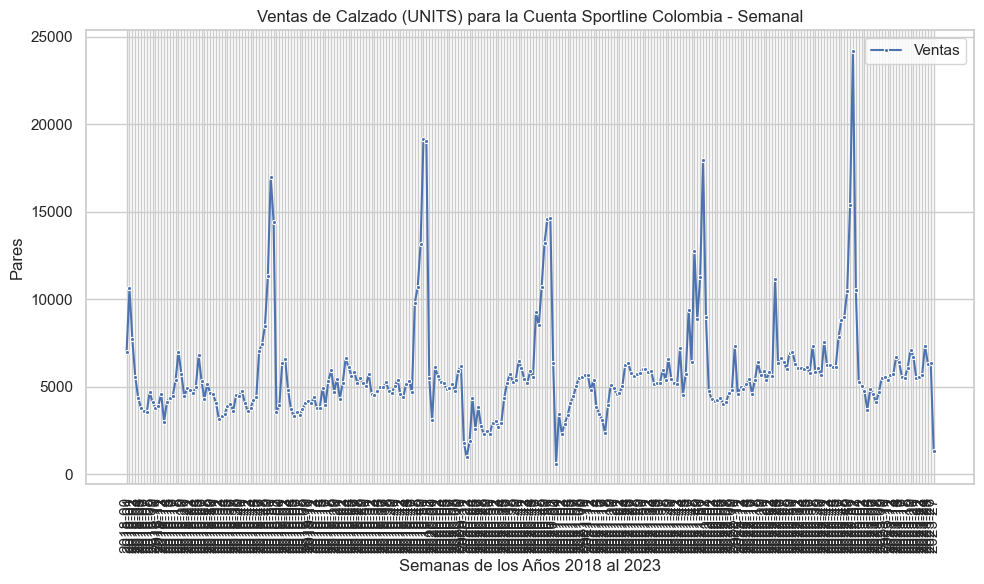

In [11]:
# Revisar la topologia de la serie de tiempos
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar la data por 'CODIGO_MARCA', y la semana del año
data_temp = weekly_sales[weekly_sales['CODIGO_MARCA'] == 456]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='WEEK_OF_YEAR', y='CANTIDAD', data=data_temp, marker='.', label='Ventas')
plt.title('Ventas de Calzado (UNITS) para la Cuenta Sportline Colombia - Semanal')
plt.xlabel('Semanas de los Años 2018 al 2023')
plt.ylabel('Pares')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()  # Add a legend to label the line

plt.show()

In [12]:
# Guardemos el DataFrame como un archivo CSV
output_file_path = "/Users/ameilij/Documents/Master Data Science/MDS/tfm/data_clean/master_POS_SLA_COL_semanal.csv"
weekly_sales.to_csv(output_file_path, index=False)
print(f"Archivo creado con éxito en {output_file_path}")

Archivo creado con éxito en /Users/ameilij/Documents/Master Data Science/MDS/tfm/data_clean/master_POS_SLA_COL_semanal.csv


Con este archivo termina el ciclo de laboratorio seco correspondiente a la creación del juego de datos de análisis de Sportline Colombia. Contamos con un excelente juego de datos para hacer un análisis EDA minucioso, que nos aporte insights concretos que aplicaremos en el entrenamiento de la data.